TEM-1-beta-Lactamase

1. Import and merging of Datesets, Assessment of possible outlier-values and Normalisation of Datasets

The original DMS-Datasets provided by Stiffler et al., Firnberg et al. and Deng et al. (and further refined by Notin et al. in their ProteinGym) are imported and merged into a single dataframe. Then, the datasets are checked for outliers with unplausible DMS-scores. Afterwards, a Min-Max-normalisation approach and a Z-Normalisation approach are tested. As a result of this assessment the Min-Max-normalisation approach will be dropped. The datasets will undergo a Z-normalisation in order to make them comparable. The subsequent analysis will be carried out with the z-normalized datasets, as well as with mean values across the three datasets.

1.1 Import and merging of data sets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import of DMS-datasets (Stiffler et al., Firnberg et al., Deng et al.):
data_stiffler = pd.read_csv('dataSources\BLAT_ECOLX_Stiffler_2015_Kopie.csv', delimiter=';')
data_firnberg = pd.read_csv('dataSources\BLAT_ECOLX_Firnberg_2014_Kopie.csv', delimiter=';')
data_deng: pd.DataFrame = pd.read_csv('dataSources\BLAT_ECOLX_Deng_2012_Kopie.csv', delimiter=';')

In [4]:
#DMS-score-columns are converted to floats:
data_deng['DMS_score'] = data_deng['DMS_score'].str.replace(',', '.').astype(float)
data_stiffler['DMS_score'] = data_stiffler['DMS_score'].str.replace(',', '.').astype(float)
data_firnberg['DMS_score'] = data_firnberg['DMS_score'].str.replace(',', '.').astype(float)

In [5]:
#Mutant scores are put in uniform order across datasets:
sortierung = data_deng.iloc[0:len(data_deng), 0]
sortierung = sortierung.tolist()

#build strucutre of dataframe:
columns = ['Stiffler', 'Deng', 'Firnberg']
index = [sortierung]
merged = pd.DataFrame(columns=columns, index=index)

#fill dataframe:
for i in range(0, len(data_stiffler)):
    mutant = data_stiffler['mutant'][i]
    score = data_stiffler['DMS_score'][i]
    merged['Stiffler'][mutant] = score
for i in range(0, len(data_deng)):
    mutant = data_deng['mutant'][i]
    score = data_deng['DMS_score'][i]
    merged['Deng'][mutant] = score
for i in range(0, len(data_firnberg)):
    mutant = data_firnberg['mutant'][i]
    score = data_firnberg['DMS_score'][i]
    merged['Firnberg'][mutant] = score

#merged dataframe contains unnormalised DMS-scores for each mutant from all three datasets.
merged.head()

,Stiffler,Deng,Firnberg
H24C,-0.41826,-3.924478,0.5646
H24Y,-0.885025,-2.170022,0.7054
H24W,-1.347586,-4.345218,0.6021
H24V,-0.026874,-3.011503,1.2224
H24T,-0.067188,-1.565248,1.2289


1.2 Assessment of possible outlier values
Do the data sets require cleaning/clipping?

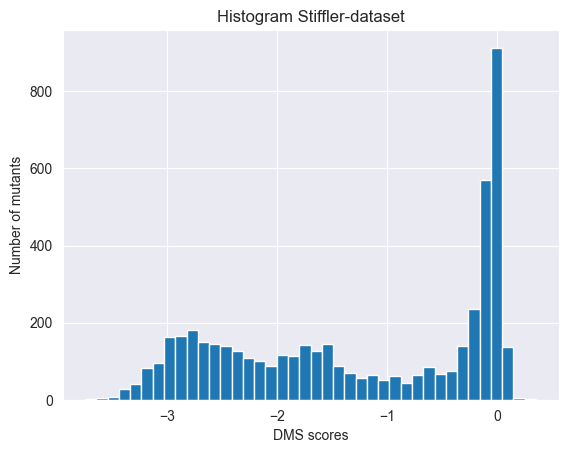

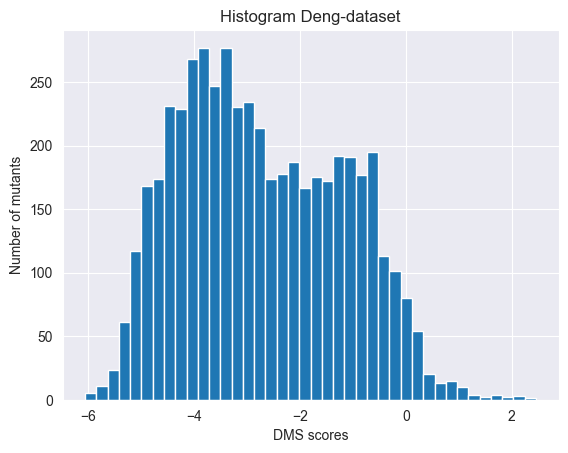

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


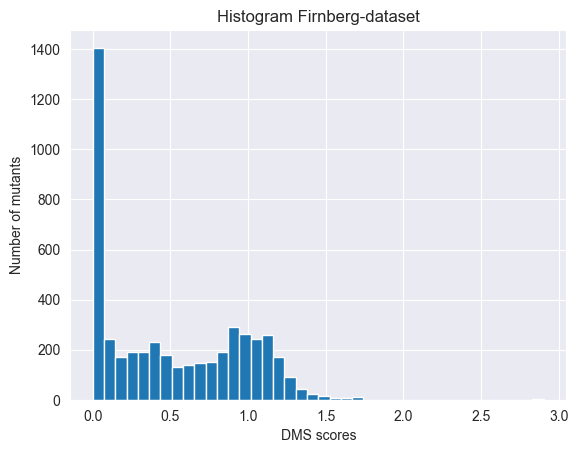

In [6]:
#plotting of datasets as histograms: Are there any outliers with unplausible values?
klassen = 40
selected_columns = merged.columns
for column in selected_columns:
    plt.hist(merged[column], bins=klassen)
    plt.xlabel("DMS scores")
    plt.ylabel("Number of mutants")
    plt.title(f"Histogram {column}-dataset")
    plt.show()

In [7]:
#look at highest valued mutants in each data set

mergedcopy=merged.copy()

mergedcopy['Stiffler']= pd.to_numeric(mergedcopy['Stiffler'], errors='coerce')
mergedcopy['Deng']= pd.to_numeric(mergedcopy['Deng'], errors='coerce')
mergedcopy['Firnberg']= pd.to_numeric(mergedcopy['Firnberg'], errors='coerce')

top_40_values_S = mergedcopy.nlargest(40, 'Stiffler')
top_40_values_S.iloc[:,0]

E210Y    0.355791
E210I    0.348571
A211M    0.299714
E210K    0.232898
E210M    0.194175
K190Q    0.177014
K190E    0.154985
E210H    0.153639
E210C    0.150784
A211D    0.149352
E210F    0.145238
P25E     0.143258
K190T    0.142137
I45F     0.139663
A222K    0.135756
P25K     0.135590
K190R    0.134726
S281N    0.131988
K190A    0.131802
T186D    0.127180
K32Q     0.122207
I45V     0.122009
Q86F     0.120341
K190N    0.116235
K190H    0.113907
E270D    0.111175
K190Y    0.110730
R118Q    0.110618
I45L     0.108688
K190I    0.108124
S221Q    0.106899
F149W    0.106531
A211H    0.106392
H110Y    0.104755
E210W    0.104545
K190S    0.101369
K190D    0.100963
S80E     0.100923
K190L    0.099246
T193K    0.098222
Name: Stiffler, dtype: float64

In [8]:

top_40_values_D = mergedcopy.nlargest(40, 'Deng')
top_40_values_D.iloc[:,1]

R118D    2.459027
S96D     2.132065
A246Y    2.094847
P172F    2.087704
V29R     1.995228
R118N    1.991613
N173D    1.756220
R118Y    1.734682
S51H     1.656377
R92V     1.655668
R273K    1.511492
R92T     1.450691
V72S     1.308101
S51N     1.252142
R118A    1.238197
R118K    1.190153
A246C    1.172648
G90D     1.156669
S96E     1.120171
R118E    1.110506
Q88H     1.082096
R118H    1.049756
L247M    1.029781
N50H     1.023233
D33Q     1.019543
L199P    0.972141
L219I    0.960522
V29A     0.944403
S281A    0.935865
Q274I    0.895202
S281N    0.873699
D33K     0.853433
N50S     0.837458
P172D    0.827281
V31C     0.816024
R118S    0.815067
L199Q    0.805764
L199H    0.805764
D33E     0.802306
A222V    0.795344
Name: Deng, dtype: float64

In [9]:

top_40_values_F = mergedcopy.nlargest(40, 'Firnberg')
top_40_values_F.iloc[:,2]

F58N     2.9024
S51D     1.7029
N98Q     1.7029
K109Y    1.7029
A148M    1.7029
V157K    1.7029
A182M    1.7029
T186C    1.7029
T186W    1.7029
L196N    1.7029
S281F    1.7029
Y103W    1.6419
T262Y    1.6307
K190D    1.6161
T112Q    1.6145
S122M    1.6073
A211D    1.6033
V29N     1.5657
L196K    1.5616
Q274T    1.5616
I171N    1.5477
Q97F     1.5424
L199I    1.5424
V29W     1.5171
Q97Y     1.4954
P60D     1.4886
H24N     1.4825
D33T     1.4825
H156I    1.4825
L196Q    1.4825
A225M    1.4825
A280M    1.4825
E237M    1.4697
H94I     1.4656
D36K     1.4598
T193K    1.4598
L199G    1.4598
T186E    1.4539
K213A    1.4482
D33H     1.4467
Name: Firnberg, dtype: float64

In [10]:
#difference in DMS scores 1st and 2nd mutant in Firnberg dataset (biggest difference in DMS scores)
print(top_40_values_F.iloc[:,2].diff().min())
#difference in DMS scores among 2nd to 40th mutant in Firnberg dataset
print(top_40_values_F.iloc[1:,2].diff().min())
#ratio
print(top_40_values_F.iloc[:,2].diff().min()/top_40_values_F.iloc[1:,2].diff().min())


-1.1995
-0.061000000000000165
19.663934426229456


In [11]:
#look at lowest valued mutants in each data set
bottom_40_values_S = mergedcopy.nsmallest(40, 'Stiffler')
bottom_40_values_S.iloc[:,0]

K71S    -3.743276
W227P   -3.576893
K71A    -3.575908
G43L    -3.575254
P181R   -3.555181
D155L   -3.537996
I243R   -3.511946
F64S    -3.494443
L74H    -3.487305
N134P   -3.487176
G76H    -3.483680
D161P   -3.456901
F64C    -3.444423
N134C   -3.421395
L136R   -3.417355
L146R   -3.408390
M209T   -3.405202
V31H    -3.399465
I125W   -3.393021
L160R   -3.392857
E35P    -3.388925
F64A    -3.388809
E164W   -3.386125
K71G    -3.385171
L146P   -3.379138
D155W   -3.378654
S68A    -3.369027
I244Y   -3.365540
G76N    -3.363727
S68E    -3.358159
E164L   -3.357557
A133L   -3.356869
M66W    -3.355591
R255P   -3.355305
G76Q    -3.354742
G76K    -3.353518
D161L   -3.351206
I125Q   -3.349302
S68W    -3.346759
P65W    -3.339319
Name: Stiffler, dtype: float64

In [12]:
bottom_40_values_D = mergedcopy.nsmallest(40, 'Deng')
bottom_40_values_D.iloc[:,1]

M115S   -6.056021
N130V   -5.999526
D155L   -5.874678
D155R   -5.874678
D155S   -5.874678
D83L    -5.815797
M115G   -5.809904
H110G   -5.761219
H94G    -5.739761
F70R    -5.720466
T116L   -5.689934
Y95G    -5.669785
Y95A    -5.669785
D174K   -5.663195
D174E   -5.663195
D174Q   -5.663195
D155P   -5.628560
D155V   -5.628560
A132G   -5.591041
N130Q   -5.578785
D83V    -5.569680
D83P    -5.569680
D83G    -5.569680
C121W   -5.549816
Y260R   -5.536955
R162L   -5.534829
M184E   -5.505446
Y44G    -5.503908
Y44W    -5.503908
Y44E    -5.503908
Y44A    -5.503908
Y44Q    -5.503908
Y95R    -5.495162
F70T    -5.474348
L188R   -5.460065
T116G   -5.443817
G239S   -5.441376
G239L   -5.441376
G114R   -5.433406
D212R   -5.399314
Name: Deng, dtype: float64

In [13]:
bottom_40_values_F = mergedcopy.nsmallest(40, 'Firnberg')
bottom_40_values_F.iloc[:,2]

G43I     0.0008
G43K     0.0008
G43M     0.0008
G43N     0.0008
Y44K     0.0008
Y44P     0.0008
I45P     0.0008
F64D     0.0008
M66D     0.0008
S68W     0.0008
S68Y     0.0008
S68Q     0.0008
S68M     0.0008
S68I     0.0008
S68F     0.0008
S68E     0.0008
S68K     0.0008
T69W     0.0008
K71E     0.0008
K71I     0.0008
K71Y     0.0008
K71P     0.0008
V72K     0.0008
L73R     0.0008
L74R     0.0008
C75Y     0.0008
V78P     0.0008
L120D    0.0008
L120R    0.0008
L120W    0.0008
C121W    0.0008
C121R    0.0008
C121P    0.0008
C121K    0.0008
A124P    0.0008
A124Y    0.0008
A124H    0.0008
A124F    0.0008
I125W    0.0008
I125P    0.0008
Name: Firnberg, dtype: float64

It is evident, that the F58N mutant in the Firnberg data set severely differs from all other values on an unplausible scale. Since the other data sets show only minor differences in their top performing mutants, this suggests, that this mutant value is an outlier and shiuld thus be clipped. Its value will be set to the one of the second best performing mutant. The resulting histogram now shows a more continous population.

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


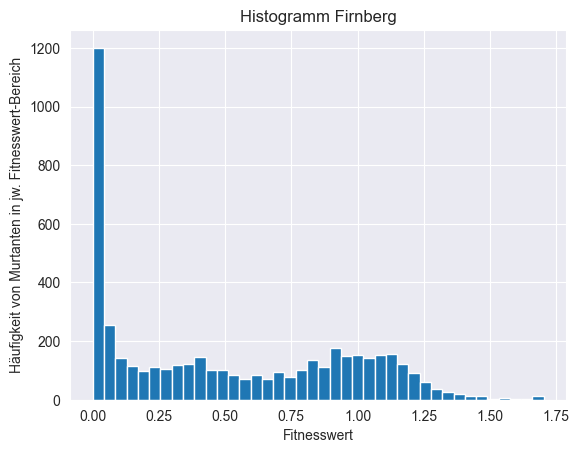

In [14]:
# set max DMS score of highest valued mutant to value of second highest valued mutant
maxvalue=merged['Firnberg'].max()
secondvalue=mergedcopy['Firnberg'].nlargest(2).iloc[-1]
merged.loc[merged['Firnberg'] == maxvalue, 'Firnberg'] = secondvalue

#plot Firnberg population in histogram
klassen = 40
plt.hist(merged['Firnberg'], bins=klassen)
plt.xlabel("Fitnesswert")
plt.ylabel("Häufigkeit von Murtanten in jw. Fitnesswert-Bereich")
plt.title(f"Histogramm {column}")
plt.show()

It is evident that there seem to be mutants with extremely high DMS-values in the Firnberg dataset, as only the lower half of the x-axis in the initial histogram is occupied by columns. Upon closer examination it becomes clear, that the spread in the histogram is caused by just one mutant DMS-score, which is unplausibly high. After clipping of this value, the histogram looks better (the whole x-axis is occupied by columns). In addition, in the Firnberg mutant population there are many values that are only just above 0, which raises the question, if this is the case due to errors in the measurement to or a result of a biological effect. The Deng and Stiffler data sets show an implied exponential decline at the edges. The fact that the respective histograms extend slightly further than the columns suggests that there could only be minor outliers present, if any at all. After closer observation of the best and worst performing mutants in the datasets, there seems to be no unplausibly extreme mutants, since there are no giant leaps in DMS-scores within the best/worst performers.
Still, after clipping, the Firnberg-dataset resembles a shape on the histogram, showing a high portion of mutants posessing values just above 0. This can be explained as follows. In their paper Finrberg et al. show their logarithmised data on a histogram in a shape closely resembling the bimodal shape of the Stiffler mutant population. (As seen above, this shape can be recreated by logarithmising the Firnberg DMS-data we are working with.) This indicates, that Firnberg and Stiffler describe the same measured trend (which fits to the observation, that they use similar measurement methods) just with different mathematical processing of the measurements. Firnberg is using an exponential model, which leads to the compression of lower performing mutants at the lower end of the DMS-score distribution when compared to the Stiffler population (The compression is gravest just over 0). Thus the accumulation of values just above 0 in the Firnberg dataset is not a result of a measurement error, but rather a consequence of the mathematical processing of the measured data.
On a further notion, the populations arising from the different data sets should prima facie appear in a similar shape on a histogram. In this assumption however we have to factor in, that different measurement methods and mathematical processing approaches have been used for each data set. Hence, differences in populations are plausible, as long as the general trends in the data sets are similar (since each group assessed the same enzyme). Thus, a different shape of each population in a histogram is plausible, as long as e.g. position effects don't deviate too much between the different data sets. (There should especially be a certain amount of similarity between the Stiffler and the Firnberg data sets regarding position effects, since similar measurement methods have been used for these data sets. Later (via a visual heatmap-analysis) it will be observed, that it is indeed the case that all datasets show a similar pattern regarding fragile/robust positions, rendering different population shapes in the histograms unproblematic.)
Moreover, regarding all three datasets, it should be noted, that it is the goal of the DMS-measurements to identify mutants with extreme fitness values in order to find both deleterious as well as enabling/functionality-increasing mutations. Thus, an exclusion or clipping of values at the lower or upper ends (e.g. a 1% clipping at both ends, that is often used) could potentially obscure sought-after effects more than it would possibly clean the datasets.
Furthermore, the provided datasets have already undergone processing by the original authors Stiffler et al., Firnberg et al. and Deng et al., as well as the creators of the ProteinGym Notin et al. The exact mathematical operations, with which the datasets have been processed by Notin et al. should not be of particular focus in this work. Concluding the last two arguments, the datasets will be regarded as already cleaned and no further exclusion or clipping of values will be performed.

1.3 Normalisation of Data
In the following, Min-Max-normalisation and Z-normalisation of the data are calculated. Then the normalisation methods are compared using mean DMS-scores for each amino acid position of each dataset. In particular, it is expected that the Firnberg and Stiffler datasets will show similar results/values with an adequate normalisation method, as their values were collected using similar methods. The similarity of the normalized datasets will be assessed visually with heatmaps and also with a Wilcoxon Signed Rank Test.

In [15]:
mergedc_n = merged.copy()
mergedc_z = merged.copy()
mergedc_log_z = merged_log.copy()

NameError: name 'merged_log' is not defined

In [ ]:
#function for Min-Max-normalisation
def min_max_filter(mergedc_n: pd.DataFrame) -> pd.DataFrame:
    'Min-Max Normalisierung'
    for x in mergedc_n.columns:
        max_value: float = mergedc_n[x].max()
        min_value: float = mergedc_n[x].min()

        mergedc_n[x] = (mergedc_n[x] - min_value) / (max_value - min_value)
    return mergedc_n
print(min_max_filter(mergedc_n))


In [ ]:
#function for Z-normalisation
gauss = {'Stiffler':[],'Deng':[],'Firnberg':[]}

for x in merged.columns:
    mu = np.mean(merged[x])
    sigma = np.std(merged[x])

    gauss[x] = [mu, sigma]
min_max_filter(mergedc_n)
def z_filter(mergedc_z: pd.DataFrame) -> pd.DataFrame:
    'Z-Normalisierung'
    for x in mergedc_z.columns:
        mu = gauss[x][0]
        sigma = gauss[x][1]
        mergedc_z[x] = (mergedc_z[x]-mu)/ sigma
    return mergedc_z
z_filter(mergedc_z)

In [ ]:
#Mean and variance for each mutant from three datasets
def mean_var_merge(data : pd.DataFrame):

    data['mean'] = data.mean(axis = 1, skipna= True)
    data['var'] = data.var(axis = 1, skipna = True )
    return data

mergedc_n_mv = mergedc_n.copy()
mergedc_z_mv = mergedc_z.copy()
mean_var_merge(mergedc_n_mv)
mean_var_merge(mergedc_z_mv)

In [ ]:
#append position column to data frames
mergedc_n_mv["Position"] = np.nan
mergedc_z_mv["Position"] = np.nan

#assign positions for each mutant
for i in range(0,len(mergedc_n_mv)):
    indices = [1,-1]
    s=mergedc_n_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_n_mv["Position"][i]=int(part)
mergedc_n_mv["Position"]=mergedc_n_mv["Position"].astype(int)

for i in range(0,len(mergedc_z_mv)):
    indices = [1,-1]
    s=mergedc_z_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_z_mv["Position"][i]=int(part)
mergedc_z_mv["Position"] = mergedc_z_mv["Position"].astype(int)

In [ ]:
#Build Position_means DataFrame
columns = ['mean_Stiffler_n','var_Stiffler_n','mean_Deng_n','var_Deng_n','mean_Firnberg_n','var_Firnberg_n','mean_all_n','var_all_n','mean_Stiffler_z','var_Stiffler_z','mean_Deng_z','var_Deng_z','mean_Firnberg_z','var_Firnberg_z','mean_all_z','var_all_z']
index = range(int(mergedc_n_mv["Position"][0]), int(mergedc_n_mv["Position"][-1])+1)

position_means= pd.DataFrame( columns = columns, index = index)
position_means.index.name="Position"

In [ ]:
#fill dataframe: Mean and variance for each position from all datasets
for i in range(mergedc_n_mv["Position"][0], mergedc_n_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_n_mv["Position"]==i)[0][0], np.where(mergedc_n_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_n_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_n"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_n"]=np.nanvar(Pos)

for i in range(mergedc_z_mv["Position"][0], mergedc_z_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_z_mv["Position"]==i)[0][0], np.where(mergedc_z_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_z_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_z"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_z"]=np.nanvar(Pos)

In [ ]:
#fill dataframe: Mean and variance for each position for each dataset

grouped_n=mergedc_n_mv.groupby("Position")
grouped_z=mergedc_z_mv.groupby("Position")
#(NaNs are excluded by default)

position_means["mean_Stiffler_n"]= grouped_n.mean()["Stiffler"]
position_means["mean_Deng_n"]= grouped_n.mean()["Deng"]
position_means["mean_Firnberg_n"]= grouped_n.mean()["Firnberg"]
position_means["mean_Stiffler_z"]= grouped_z.mean()["Stiffler"]
position_means["mean_Deng_z"]= grouped_z.mean()["Deng"]
position_means["mean_Firnberg_z"]= grouped_z.mean()["Firnberg"]

position_means["var_Stiffler_n"]= grouped_n.var()["Stiffler"]
position_means["var_Deng_n"]= grouped_n.var()["Deng"]
position_means["var_Firnberg_n"]= grouped_n.var()["Firnberg"]
position_means["var_Stiffler_z"]= grouped_z.var()["Stiffler"]
position_means["var_Deng_z"]= grouped_z.var()["Deng"]
position_means["var_Firnberg_z"]= grouped_z.var()["Firnberg"]

position_means

In [ ]:
#visual analysis via heatmap:

# Heatmap Min-Max-normalisation
spalten_n = [0, 4, 2]
position_means_rearranged = position_means.iloc[:, spalten_n]
data_heatmap = position_means_rearranged.astype(float)
sns.heatmap(data_heatmap)

In [ ]:

# Heatmap Z-normalisation
spalten_z = [8, 12, 10]
position_means_rearranged = position_means.iloc[:, spalten_z]
data_heatmap = position_means_rearranged.astype(float)
sns.heatmap(data_heatmap)


It is clear that the Stiffler and Firnberg values are very close to each other for the Z-normalisation. For the Min-Max-normalisation, a similar pattern emerges for the two data sets, but the Firnberg values seem to be consistently lower than the Stiffler values. Thus, Z-normalisation seems to be the adequate  normalisation method for the datasets. Furthermore, it becomes clear that, as expected, the Deng data deviate more from the Stiffler and Firnberg data. This effect is observed for both normalisation methods.

Here an additional test (Wilcoxon Signed Rank Test) is undertaken, to confirm the visual analysis via the heatmaps. In the Wilcoxon Signed Rank Test the probability that values "come from the same population" is determined. This calculated probability (p-value) should be high because the same enzyme is being tested, the values actually come from the same population and only the test methods were different. Therefore, a high p-value is an indicator of a good normalisation method, which should make the data sets comparable to each other. Deviations from p-values close to 100% can be explained by differences in the measurement methods, that may mildly obscure the likelyness of the data sets.

In [ ]:
#Wilcoxon Signed Rank Test
from scipy.stats import wilcoxon
samples = position_means_Z.columns[[0,2,4]]
  # All columns exept position column
for i in range(len(samples)):
        for j in range(i+1, len(samples)):
            sample1 = position_means_Z[samples[i]]
            sample2 = position_means_Z[samples[j]]

            stat, p_value = wilcoxon(sample1, sample2, alternative='two-sided')
            print(f"Wilcoxon-Signed-Rank-Test: {samples[i]} vs {samples[j]}")
            print(f"Statistik: {stat}, p-Wert: {p_value}")



In [ ]:
position_means_N=position_means.iloc[:,:8]
position_means_N

#mal zum testen, wie sehr die DS "korrelieren"
from scipy.stats import wilcoxon
samples = position_means_N.columns[[0,2,4]]
  # Alle Spalten außer der Positionsspalte
for i in range(len(samples)):
        for j in range(i+1, len(samples)):
            sample1 = position_means_N[samples[i]]
            sample2 = position_means_N[samples[j]]

            stat, p_value = wilcoxon(sample1, sample2, alternative='two-sided')
            print(f"Wilcoxon-Signed-Rank-Test: {samples[i]} vs {samples[j]}")
            print(f"Statistik: {stat}, p-Wert: {p_value}")



The Wilcoxon Signed Rank Test shows that the Min-Max-normalisation does not make the values comparable a it produces very small p-values. The Z-normalisation, on the other hand, produces high p-values, thus makes the values from the different data sets easily comparable. This confirms the previous visual analysis via heatmaps. Therefore the Z-Normalisation method is regarded as the more suitable one and is used for the following analysis.

In [ ]:
#drop Min-Max-normalization
position_means_Z=position_means.iloc[:,8:]
position_means_Z

2. Position Effects and Assessment of Normalisation Methods
Here the mean DMS-score will be assessed as a possible metric to describe the fragility/robustess upon mutation of a amino acid position. The accuracy of this description is later assessed by a comparison of the mean DMS-score of a position and it's actual conservation in chapter ###. Next to the mean DMS-score other possible models for the description of robustness/fragility will be assessed in the same way: We called them Quantile Model and Area Under Curve (AUC) Model. Their derivation will be explained further below in this chapter.


2.2. Visual Representation of DMS-scores: Mutants (Title ???)
Heat maps are created for all mutants at the different positions for each data set. In this way, particularly fragile positions are identified visually. Positions for which many or all mutants show significantly negative fitness effects will be considered fragile. Positions for which remarkably many or all mutants show neutral or even positive fitness effects will be regarded as robust.

In [ ]:
#Create data frames for heatmaps:

merged_copy = mergedc_z_mv.iloc[:,:3].copy()
#extract number in index
merged_copy['Number'] = merged_copy.index.get_level_values(0).str[1:-1].astype(int)

#extract last letter of index
merged_copy['Introduced Amino Acid'] = merged_copy.index.get_level_values(0).str[-1]

# create seperate data frame for each column/dataset, spread them by introduces aminoacid and by position
stiffler_df = merged_copy.pivot(index='Number', columns='Introduced Amino Acid', values='Stiffler')
deng_df = merged_copy.pivot(index='Number', columns='Introduced Amino Acid', values='Deng')
firnberg_df = merged_copy.pivot(index='Number', columns='Introduced Amino Acid', values='Firnberg')

# show dataframes
print("Stiffler DataFrame:")
print(stiffler_df)
print("\nDeng DataFrame:")
print(deng_df)
print("\nFirnberg DataFrame:")
print(firnberg_df)

stiffler_df = stiffler_df.astype(float)
deng_df = deng_df.astype(float)
firnberg_df = firnberg_df.astype(float)

In [ ]:
#plotting of heatmaps

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for Stiffler DataFrame
plt.figure(figsize=(15, 45))
ax=sns.heatmap(stiffler_df, cmap='summer_r', square=True)
plt.title('DMS Scores - Stiffler et al.')


plt.show()
plt.close()

# Heatmap for Deng DataFrame
plt.figure(figsize=(15, 45))
ax=sns.heatmap(deng_df, annot=False, cmap='summer_r', square=True)
plt.title('DMS Scores - Deng et al.')

plt.show()
plt.close()

# Heatmap for Firnberg DataFrame
plt.figure(figsize=(15, 45))
ax=sns.heatmap(firnberg_df, annot=False, cmap='summer_r', square=True)
plt.title('DMS Scores - Firnberg et al.')

plt.show()
plt.close()


In [ ]:
#Plotting of position means
for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.show()

However, there are sometimes large variances in the individual position effects, so fo the effect of a mutation of a certain position it is decisive which amino acid is introduced. In these cases, it is not always possible to speak of "robust" or "fragile" positions. The variances as a metric for the uncertainty in the assignment of the attributes "robust" or "fragile" to a position, are plotted in the following.

In [ ]:
#Variances can be projected into the mean DMS-score plot as error bars
import numpy as np

for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index

    values_to_round = position_means_Z.iloc[:, j+1].apply(lambda x: round(x, 5))  # round to 5 decimal places
    error_values = np.sqrt(values_to_round)  # square root

    plt.figure(figsize=(30,15))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0, yerr=error_values)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.show()
###??? drin behalten?

2.3. Position Effect Models
In the following, an attempt is made to represent position effects more precisely than by the mere mean DMS-scores of a position.
First, only the 25% highest and lowest valued mutants from the individual data sets are considered. For each position, it is determined how many % of the mutants belonging to it (i.e. mutants with mutations at the respective position) belong to the top/bottom 25%. This figure is a first approximation of the "robustness" or "fragility" of the positions. The larger the proportion of mutants of a position in the top 25% mutant, the more robust it is against mutations. By analogy, the proportion of a position in the bottom 25% corresponds to its fragility.

In [ ]:
#look at tops:
top_25=mergedc_z_mv.copy()
# create list for dataframes
top_25_DSlist = []

#iterate over dfirst 4 columns
for col in top_25.columns[:4]:
    # create new dataframe with 2 columns
    new_DS = top_25[[col, 'Position']]
    # append dataframe to list
    top_25_DSlist.append(new_DS)
top_25_DSlist

for i in range(0, len(top_25_DSlist)):
    t=top_25_DSlist[i].quantile(0.75)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    top_25_DSlist[i].iloc[:,0] = top_25_DSlist[i].iloc[:,0] >= t #give attribute True oder False to each mutatnt (True means it is above quantile threshhold, False means it is not)

#look at bottoms:
bottom_25=mergedc_z_mv.copy()
# create list for dataframes
bottom_25_DSlist = []

#iterate over dfirst 4 columnsfor col in top_25.columns[:4]:
for col in bottom_25.columns[:4]:
    # create new dataframe with 2 columns
    new_DS = bottom_25[[col, 'Position']]
    # append dataframe to list
    bottom_25_DSlist.append(new_DS)
bottom_25_DSlist

for i in range(0, len(bottom_25_DSlist)):
    t=bottom_25_DSlist[i].quantile(0.25)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    bottom_25_DSlist[i].iloc[:,0] = bottom_25_DSlist[i].iloc[:,0] <= t #set True or False to each mutatnt (True means it is below threshhold, False means it is not)

#position effect from von 0 bis 1:
top_25_DSlist_poseff=[]
for i in range (0, len(top_25_DSlist)):
    x=top_25_DSlist[i].iloc[:,0].groupby(top_25_DSlist[i].iloc[:,1])
    top_25_DSlist_poseff.append(x.mean()) #mean of values of 1 or 0 (True or False) calculated. THis corresponds to the portion of mutants belonging to top 25% at each respective position. (Here it is important to calculate the mean instead of just counting the 1s, becuase positions with less mutants tested or with missing values could be underrepresented)

    bottom_25_DSlist_poseff=[]
for i in range (0, len(bottom_25_DSlist)):
    x=bottom_25_DSlist[i].iloc[:,0].groupby(bottom_25_DSlist[i].iloc[:,1])
    bottom_25_DSlist_poseff.append(x.mean())#mean of values of 1 or 0 (True or False) calculated. This corresponds to the portion of mutants belonging to bottom 25% at each respective position. (Here it is important to calculate the mean instead of just counting the 1s, becuase positions with less mutants tested or with missing values could be underrepresented)


top_25_DSlist_poseff
bottom_25_DSlist_poseff

In [ ]:
#plotting: (Robustness (Top) gets positive values, Fragility (Bottom) gets negative values):

positions = top_25_DSlist_poseff[0].index

for i in range (0, len(top_25_DSlist)):
    top_values = top_25_DSlist_poseff[i]
    bottom_values = bottom_25_DSlist_poseff[i]*-1

    x = range(len(positions))

    plt.figure(figsize=(16,9))
    plt.bar(x, top_values, label='Top',color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_25.columns[i])

    plt.show()


It is evident, that no position shows high portions of it's mutants inside the top AND bottom 25%. This would undermine the informative value of this model, since a position is considered to be either fragile, robust or neutral. A position containing significant numbers of mutants belonging to the top and bottom 25% of the dataset would mean, that the introduced amino acid would play a much more important role than the position of mutation regarding the fitness effects of mutations. Since this is not the case, the focus of this work will be on positional effects of mutations rather than on the introduces amino acids.

We observe, that a position can have:

 a) a stronger tendency to either the top or bottom end of the values (thus being rather robust or rather fragile) or
 b) no bars or only small bars, sometimes in both positive and negative direction.

a) corresponds to a position that can be regarded as robust or fragile, whereas b) includes positions with overall mildly negative fitness effects upon mutation. (If thwre are two small bars for a position it means, that this positions contains just a small number of mutants that belong to BOTH the top and bottom 25% of the data set. This position would be considered neutral, with a slightly larger spread in it's mutant's DMS-scores.

However, setting a cutoff at the top/bottom 25% is more or less arbitrary (this was also done by Leander et al., for example, but was also done without justification there). Therefore, in the following a metric is developed that summarises the proportions of mutants of a position in the top/bottom x% for all possible x's. First, the proportion of mutants of each position in the top/bottom 50% is determined, since the top 51%, for example, would already contain some of the below-average mutants. Then the shares for the top/bottom 49%, 48%, ..., 1% are determined and stored in a DataFrame. This results in a hypothetical curve for each position in which the proportion of its mutants among the TOP x% mutants decreases as x increases. Similarly, for each position there is a hypothetical curve in which the proportion of its mutants among the BOTTOM x% mutants decreases as x decreases. The area under these hypothetical curves (AUC) can be used as a metric for robustness (when derived from the top-curve) and fragility (when derived from the bottom-curve) for each position. The resulting "AUC values" are stored in top/bottom_auc_df.

In [ ]:
#proportions of mutants [%] among top bottom x% for each position are calculated
#tops:

top_Fit=mergedc_z_mv.copy()
top_Fit_DSlist=[]
for col in top_Fit.columns[:4]:
    new_DS = top_Fit[[col, 'Position']]
    top_Fit_DSlist.append(new_DS)



top_Fit_Qlist=[]
top_used_quantiles=[]
for i in range(0, len(top_Fit_DSlist)):
    top_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (0,50):
        top_Fit_Qlist[i].insert(j, top_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j+50)/100 #iterate over Quantiles 50% - 99%
        t=top_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        top_Fit_Qlist[i][j].iloc[:,0]=(top_Fit_Qlist[i][j].iloc[:,0] >= t)
        if i == len(top_Fit_DSlist)-1:
            top_used_quantiles.append(q) #keep used quantiles for later weighting of quantile values

#calculate top % for each position for different quantile-threshholds for each dataset

top_Fit_Qlist_poseff=[]
for i in range (0, len(top_Fit_DSlist)):
    top_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,50):
        x=top_Fit_Qlist[i][j].iloc[:,0].groupby(top_Fit_Qlist[i][j].iloc[:,1])
        top_Fit_Qlist_poseff[i].insert(j, x.mean())

top_Fit_Qlist_poseff

#bottoms:
bottom_Fit=mergedc_z_mv.copy()
bottom_Fit_DSlist=[]
for col in bottom_Fit.columns[:4]:
    new_DS = bottom_Fit[[col, 'Position']]
    bottom_Fit_DSlist.append(new_DS)



bottom_Fit_Qlist=[]
bottom_used_quantiles=[]
for i in range(0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (0,50):
        bottom_Fit_Qlist[i].insert(j, bottom_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j+1)/100 #iterate over Quantiles 1% - 50%
        t=bottom_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        bottom_Fit_Qlist[i][j].iloc[:,0]=(bottom_Fit_Qlist[i][j].iloc[:,0] <= t)
        if i == len(bottom_Fit_DSlist)-1:
            bottom_used_quantiles.append(q)

#calculate bottom % for each position for different quantile-threshholds for each dataset

bottom_Fit_Qlist_poseff=[]
for i in range (0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,50):
        x=bottom_Fit_Qlist[i][j].iloc[:,0].groupby(bottom_Fit_Qlist[i][j].iloc[:,1])
        bottom_Fit_Qlist_poseff[i].insert(j, x.mean())


In [ ]:
#extract proportions for each position at different quantiles (dofferent x) for each dataset to plot curve and calculate area under curve as robustness/fragility-score of a position:

#tops:
top_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed structure (positions by datasets)


for i in range(0, len(top_Fit_DSlist)): #iterate over datasets
    m=i*2
    for k in range(0,len(top_Fit_Qlist_poseff[0][0])): #iterate over positions
        top_pos_eff_quantiles=[]
        for j in range(0,50): #iterate over quantiles
            top_pos_eff_quantiles.append(top_Fit_Qlist_poseff[i][j].iloc[k])
        top_pos_eff_quantiles_df.iloc[k,m]=top_pos_eff_quantiles
top_pos_eff_quantiles_df = top_pos_eff_quantiles_df.drop(top_pos_eff_quantiles_df.columns[[1, 3, 5, 7]], axis=1)


#bottoms:

bottom_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed structure (positions by datasets)


for i in range(0, len(bottom_Fit_DSlist)): #iterate over datasets
   m=i*2
   for k in range(0,len(bottom_Fit_Qlist_poseff[0][0])): #iterate over positions
     bottom_pos_eff_quantiles=[]
     for j in range(0,50): #iterate over quantiles
        bottom_pos_eff_quantiles.append(bottom_Fit_Qlist_poseff[i][j].iloc[k])
     bottom_pos_eff_quantiles_df.iloc[k,m]=bottom_pos_eff_quantiles
bottom_pos_eff_quantiles_df = bottom_pos_eff_quantiles_df.drop(bottom_pos_eff_quantiles_df.columns[[1, 3, 5, 7]], axis=1)


In [ ]:
#exemplatory plot of characteristic curve of position 24 (top) and position 31 (bottom) from Stiffler Dataset:
plt.plot(top_used_quantiles, top_pos_eff_quantiles_df.iloc[0,:][0])
plt.title('Position 24')
plt.xlabel('Quantiles for cutoff')
plt.ylabel('Proportion of mutants among tops')
plt.show()

plt.plot(top_used_quantiles, bottom_pos_eff_quantiles_df.iloc[7,:][0])
plt.title('Position 31')
plt.xlabel('Quantiles for cutoff')
plt.ylabel('Proportion of mutants among bottoms')
plt.show()


#these characteristic curves exists for each position for each dataset

In [ ]:
#the pos_eff_quantiles_dfs contains for each Dataset and each position the Fragility/Robustness-scores for Quantiles 50% - 99% / 1%-50%
#now we fit curves to each position in each dataset and calculate the Area Under Curve
from scipy.integrate import trapz

top_auc_df = pd.DataFrame()

# calculate AUC fpr each column and save it in new dataframe
for col in top_pos_eff_quantiles_df.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = top_pos_eff_quantiles_df[col].apply(lambda x: trapz(x, dx=1))
        top_auc_df[new_col_name] = auc_values

# stick position column to it
top_auc_df.index.name = 'Position'

bottom_auc_df = pd.DataFrame()

# calculate AUC fpr each column and save it in new dataframe
for col in bottom_pos_eff_quantiles_df.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = bottom_pos_eff_quantiles_df[col].apply(lambda x: trapz(x, dx=1))
        bottom_auc_df[new_col_name] = auc_values

# stick position column to it
bottom_auc_df.index.name = 'Position'


In [ ]:
#plot

positions = top_auc_df.index

for i in range (0, len(top_auc_df.columns)):
    top_values = top_auc_df.iloc[:,i]
    bottom_values = bottom_auc_df.iloc[:,i]*-1

# X-Koordinates for bars
    x = range(len(positions))

# Barplot
    plt.figure(figsize=(16,9))
    plt.bar(x, top_values, label='Top',color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_auc_df.columns[i])

    plt.show()

It could be argued that as x increases, the mutants that still fall within the top/bottom x% become more significant for the robustness/fragility of a position. Therefore, a weighting factor k is introduced in the following (the respective quantile values x% (or 1 - x% for bottoms) are put to the power of k and then mulitplied with the shares of the mutants of a position in the top/bottom x%. As k increases, more extreme mutants are weighted more heavily. The resulting "weighted AUC values" are stored in top/bottom_auc_df_weighted

In [ ]:
#weigh extreme values more (k=0 would correspond to unweighted/all mutants at same weight)
k=1

top_used_quantiles=np.array(top_used_quantiles)
bottom_used_quantiles=np.flip(top_used_quantiles)

top_pos_eff_quantiles_df_weighted=top_pos_eff_quantiles_df.copy()
for i in range(0, len(top_pos_eff_quantiles_df.columns)):
    for j in range(0, len(top_pos_eff_quantiles_df)):
        top_pos_eff_quantiles_df_weighted.iloc[j,i]=top_pos_eff_quantiles_df.iloc[j,i]*(top_used_quantiles**k)

bottom_pos_eff_quantiles_df_weighted=bottom_pos_eff_quantiles_df.copy()
for i in range(0, len(bottom_pos_eff_quantiles_df.columns)):
    for j in range(0, len(bottom_pos_eff_quantiles_df)):
        bottom_pos_eff_quantiles_df_weighted.iloc[j,i]=bottom_pos_eff_quantiles_df.iloc[j,i]*(bottom_used_quantiles**k)

#same AUC stuff as above

from scipy.integrate import trapz

top_auc_df_weighted = pd.DataFrame()

for col in top_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = top_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        top_auc_df_weighted[new_col_name] = auc_values

top_auc_df_weighted.index.name = 'Position'

bottom_auc_df_weighted = pd.DataFrame()

for col in bottom_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = bottom_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        bottom_auc_df_weighted[new_col_name] = auc_values

bottom_auc_df_weighted.index.name = 'Position'

#plot
for i in range(0, len(top_auc_df_weighted.columns)):
    top_values = top_auc_df_weighted.iloc[:, i]
    bottom_values = bottom_auc_df_weighted.iloc[:, i] * -1

    xwerte = top_auc_df_weighted.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, top_values, label='Top', color='red', width=0.5, linewidth=0)
    plt.bar(xwerte, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(top_auc_df_weighted.columns[i])
    plt.show()


The weighting factor k can be chosen at different magnitudes.

In [ ]:
#AUC model for different k's
weighted_AUC_dfs = []

for k in range (0,200):

    top_used_quantiles=np.array(top_used_quantiles)
    bottom_used_quantiles=np.flip(top_used_quantiles)

    top_pos_eff_quantiles_df_weighted=top_pos_eff_quantiles_df.copy()
    for i in range(0, len(top_pos_eff_quantiles_df.columns)):
        for j in range(0, len(top_pos_eff_quantiles_df)):
           top_pos_eff_quantiles_df_weighted.iloc[j,i]=top_pos_eff_quantiles_df.iloc[j,i]*(top_used_quantiles**k)

    bottom_pos_eff_quantiles_df_weighted=bottom_pos_eff_quantiles_df.copy()
    for i in range(0, len(bottom_pos_eff_quantiles_df.columns)):
       for j in range(0, len(bottom_pos_eff_quantiles_df)):
            bottom_pos_eff_quantiles_df_weighted.iloc[j,i]=bottom_pos_eff_quantiles_df.iloc[j,i]*(bottom_used_quantiles**k)

#same AUC stuff as above

    from scipy.integrate import trapz

    top_auc_df_weighted = pd.DataFrame()

    for col in top_pos_eff_quantiles_df_weighted.columns:
        if col != 'Position':
            new_col_name = col + 'AUC'
            auc_values = top_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
            top_auc_df_weighted[new_col_name] = auc_values

    top_auc_df_weighted.index.name = 'Position'

    bottom_auc_df_weighted = pd.DataFrame()

    for col in bottom_pos_eff_quantiles_df_weighted.columns:
        if col != 'Position':
            new_col_name = col + 'AUC'
            auc_values = bottom_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
            bottom_auc_df_weighted[new_col_name] = auc_values

    bottom_auc_df_weighted.index.name = 'Position'

#check if absolute value of bottom or top AUC value for each position is larger. The value with the larger absolute will be taken as the value corresponding to the respective position, with bottom AUC values being negative and top AUC values being positive. (The unweighted AUC values are contained as well (k=0).)
    top_auc_df_weighted=pd.DataFrame(top_auc_df_weighted)
    bottom_auc_df_weighted=pd.DataFrame(bottom_auc_df_weighted)
    weighted_AUC_Model = pd.DataFrame(index=top_auc_df_weighted.index, columns=top_auc_df_weighted.columns)

    for i, row in top_auc_df_weighted.iterrows():
        for j, value in row.items():
            weighted_AUC_Model.loc[i, j] = value if abs(value) >= abs(bottom_auc_df_weighted.loc[i, j]) else -bottom_auc_df_weighted.loc[i, j]

    weighted_AUC_dfs.append(weighted_AUC_Model)

In [ ]:
#check if absolute value of bottom or top 25% value for each position is larger. The value with the larger absolute will be taken as the value corresponding to the respective position, with bottom 25% values being negative and top 25% values being positive.

top_25_DSlist_poseff=pd.DataFrame(top_25_DSlist_poseff)
bottom_25_DSlist_poseff=pd.DataFrame(bottom_25_DSlist_poseff)
twentyfive_Model = pd.DataFrame(index=top_25_DSlist_poseff.index, columns=top_25_DSlist_poseff.columns)

for i, row in top_25_DSlist_poseff.iterrows():
    for j, value in row.items():
        twentyfive_Model.loc[i, j] = value if abs(value) >= abs(bottom_25_DSlist_poseff.loc[i, j]) else -bottom_25_DSlist_poseff.loc[i, j]



Now, the mean DMS-score model of the position effects, as well as the Quantile model and the AUC model (with different weighting factors k) are examined for their ability to represent the robustness or fragility of a position accurately. The correlation of the various calculated values with the actual conservation of the positions resulting from multiple sequence alignments with homologous or related enzymes (which is calculated in chapter xxx for...) is chosen as the benchmark for this test. This is based on the assumption that fragile positions are be more conserved in nature than robust positions.

In [ ]:
DMS_Conservation  = pd.read_csv('DMS_Conservation.csv') ###

C_df_New = DMS_Conservation.copy()
C_df_New['Position'] = range(24,287)


fig, axs = plt.subplots(2, 4, figsize=(50, 20))

for i, col in enumerate(C_df_New.columns):
    if col == 'Position' or col == 'Pei&Grishin' or col =='Conserved_Shannon':
        continue
    else:
        axs[0,i-1].scatter(C_df_New[col], C_df_New['Pei&Grishin'])
        axs[1,i-1].scatter(C_df_New[col], C_df_New['Conserved_Shannon'])
        axs[0, i-1].set_xlabel(col)
        axs[0, i-1].set_ylabel('Conservation score')

        axs[1, i-1].set_xlabel(col)
        axs[1, i-1].set_ylabel('Conservation score')


plt.xlabel('DMS')
plt.ylabel('Conservation score')
plt.tight_layout()
plt.show()

In [ ]:
#Correlation
cor_df = pd.DataFrame()

for i in range (0,4):
    for j in range(4,6):
        correlation = DMS_Conservation.iloc[:,i].corr(DMS_Conservation.iloc[:,j])
        cor_df.loc[i,j]=correlation

cor_df.rename(index={0:'Stiffler means',1:'Deng means', 2:'Firnberg means',3:'mean means'}, columns={4:'Conserved', 5:'Shannon'})



In [ ]:
#look at mean from Stiffler-Firnberg:
cor_df_SF = pd.DataFrame()

for j in range(4,6):
    correlation = ((DMS_Conservation.iloc[:,0]+DMS_Conservation.iloc[:,2])/2).corr(DMS_Conservation.iloc[:,j])
    cor_df_SF.loc[0,j]=correlation

cor_df_SF.rename(index={0:'Stiffler-Firnberg mean means'}, columns={4:'Conserved', 5:'Shannon'})



In [ ]:


#for i in range (0,3):
 #   twentyfive_Model.iloc[:,i] = pd.to_numeric(twentyfive_Model.iloc[:,i], errors='coerce')
  #  AUC_Model.iloc[:,i] = pd.to_numeric(AUC_Model.iloc[:,i], errors='coerce')



Corr25_df = pd.DataFrame()
for i in range (0,4):
    for j in range(4,6):
        correlation = pd.to_numeric(twentyfive_Model.transpose().iloc[:,i]).corr(DMS_Conservation.iloc[:,j])
        Corr25_df.loc[i,j]=correlation

Corr25_df.rename(index={0:'Stiffler 25',1:'Deng 25', 2:'Firnberg 25',3:'mean 25'}, columns={4:'Conserved', 5:'Shannon'})


In [ ]:

CorrweightedAUC_list=[]
for k in range(0,200):

    for i in range (0,3):
        weighted_AUC_dfs[k].iloc[:,i] = pd.to_numeric(weighted_AUC_dfs[k].iloc[:,i], errors='coerce')
    CorrAUC_df = pd.DataFrame()
    for i in range (0,4):
        for j in range(4,6):
            correlation = pd.to_numeric(weighted_AUC_dfs[k].iloc[:,i]).corr(DMS_Conservation.iloc[:,j])
            CorrAUC_df.loc[i,j]=correlation
            Copy=CorrAUC_df.copy()
            Copy.rename(index={0:'Stiffler weighted AUC',1:'Deng weighted AUC', 2:'Firnberg weighted AUC',3:'mean weighted AUC'}, columns={4:'Conserved', 5:'Shannon'})
    CorrweightedAUC_list.append(Copy)

In [ ]:
CorrweightedAUC_list

In [ ]:
#select best correlations for eack k-value
for i in range(0,200):
    m=CorrweightedAUC_list[i].max()
    n=CorrweightedAUC_list[i].min()
    print(i)
    print(m.iloc[0])
    print(n.iloc[1])

The Shannon Conservation correlates negatively with the Position Effect scores, since a highly negative conservation score resembles a very conserved position whereas a negative/low Position Effect score resembles a fragile position, which is assumed to be rather conserved. Since the ??? Correlation assigns positive conservartion scores to conserved positions, there is a positive correlation between the conservation scores and the Position Effect scores.
It becomes clear, that neither the Quantile Model nor the AUC Model comes close to the predicitve accuracy of the Mean DMS-score Model regarding conservation. No r-value of the correlation between the conservation scores and the position effects described by them comes close to the r-values realized by the Mean DMS-score Model. Thus, the best indicator for fragility/robustness of a position tested in this project is the average DMS-score of the mutants corresponding to an amino acid position.
Comparing the r-values of the different datasets in the Mean DMS-score Model, it is evident, that the Firnberg-Dataset describes the conservedness of the positions the most accuratey, closely followed by the Stiffler-Dataset. This similarity in accuracy is unsurprising, since it has previously been shown how similar the to datasets are, resulting from a similar measurement method in the DMS-scoring. The Deng-Dataset is significantly less accurate, while still showing r-values within the significant region (between 0.5 and 1 or -0.5 and -1). When comparing the correlations realized by the mean over all three datasets and the mean over just the Sfittler and Deng Datasets, there is only a marginal difference in accuracy though.
Generally, the Shannon-Conservation was predicted slightly more accurate.

In [ ]:
#save correlation data as Correlations.csv

with pd.ExcelWriter('Correlations.xlsx') as writer:
    cor_df.to_excel(writer, sheet_name='Correlation Mean DMS-score Model', index=False)
    cor_df_SF.to_excel(writer, sheet_name='Correlation Mean DMS-score Model (Mean Firnberg-Stiffler)', index=False)
    twentyfive_Model.to_excel(writer, sheet_name='Correlation Quantile Model', index=False)
    CorrweightedAUC_list.to_excel(writer, sheet_name='Correlation AUC Model', index=False)

#save position effect data as Position_Effects.csv
position_means_Z.to_csv('Position_Effects.csv', index=False)

#save mutant data as Mutants_Znorm.csv
mergedc_z_mv.to_csv('Mutants_Znorm.csv', index=False)
